# Stratified k-fold para problemas de regresion

Este tipo de validación cruzada nos ayuda a mantener el número de separaciones de manera constante.
Si se cuentan con más de 10k muestras lo recomendable es usar 10 o 20 bins.
Si el número de muestras es menor se recomienda la regla de Sturge's

Regla Sturge:

$Number$ $of$ $bins$ = 1 +$log$<sub>2</sub>($N$)

Donde $N$ es el número de muestras que se tiene en el conjunto de datos

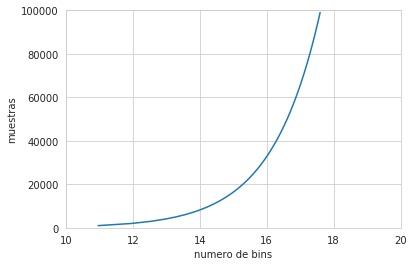

In [1]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn import model_selection

sns.set_style('whitegrid')
samples = [i for i in range(1000,100000,1000)]
number_bins = [1 + math.log2(i) for i in samples]

plt.xlabel("numero de bins")
plt.ylabel("muestras")
plt.xlim(10,20)
plt.ylim(0,100000)
plt.plot(number_bins, samples)
plt.show()

In [2]:
#Creando la función
def create_folds(data):
    #Creando una nueva columna llamada kfold y llenandola con -1
    data['kfold'] = -1

    #aleatorizando las filas de los datos
    data = data.sample(frac=1).reset_index(drop=True)

    #calculando el numero de bins con la regla de sturge
    num_bins = int(np.floor(1 + np.log2(len(data))))

    #creando los targets del bin
    data.loc[:, "bins"] = pd.cut(
        data['target'], bins=num_bins, labels=False
    )

    #iniciando la clase kfold desde model_selection
    kf = model_selection.StratifiedKFold()

    #rellenando de nuevo la columnas kfold
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, 'kfold'] = f

    #eliminando la columna bins
    data = data.drop("bins", axis=1)

    #Regresando el dataframe
    return data

In [3]:
#Creando un conjunto de datos con 15000 muestras, 100 columnas y un target
X, y = datasets.make_regression(
    n_samples=15000, n_features=100, n_targets=1
)

#Creando un dataframe de los arrays creados.
df = pd.DataFrame(
    X,
    columns=[f"f_{i}" for i in range(X.shape[1])]
)
df.loc[:, "target"] = y

#Creando los folds
df = create_folds(df)

In [4]:
df.kfold.unique() #podemos ver que se crearon 5 folds

array([0, 1, 2, 3, 4])

Podemos ver que nuestro dataframe se puede separar en 5 partes iguales siguiendo la regla de sturge
y con esto podemos asegurarnos que tenemos una buena validación cruzada.

In [5]:
# noinspection JupyterKernel
for i in range(len(df.kfold.unique())):
    print(len(df[df.kfold == i]))

3000
3000
3000
3000
3000
